In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express  as px
import re

sns.set_style('whitegrid')

In [55]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

# Links Project
- Data : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
- 2 Types of Duplicate Features in Machine Learning : https://towardsdatascience.com/2-types-of-duplicate-features-in-machine-learning-2931de6c949b
- A Practical Guide to Data Cleaning: https://deepchecks.com/what-is-data-cleaning/
- Guia Básico de Pré-Processamento de Dados : https://sigmoidal.ai/guia-basico-de-pre-processamento-de-dados/#:~:text=Standard%20Scaler&text=Na%20documenta%C3%A7%C3%A3o%2C%20eles%20explicam,mais%20manej%C3%A1veis%20para%20nossos%20modelos
- Ideia inicial: https://www.youtube.com/watch?v=juKW9Hjsktc


# Heart Disease

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
 The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.



In [56]:
dataHeart = pd.read_csv('data/heart.csv')
dataHeart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [57]:
dataHeart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [58]:
dataHeart.duplicated().sum()

723

In [59]:
dataHeart = dataHeart.drop_duplicates()
dataHeart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [60]:
dataHeart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [61]:
dataHeart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

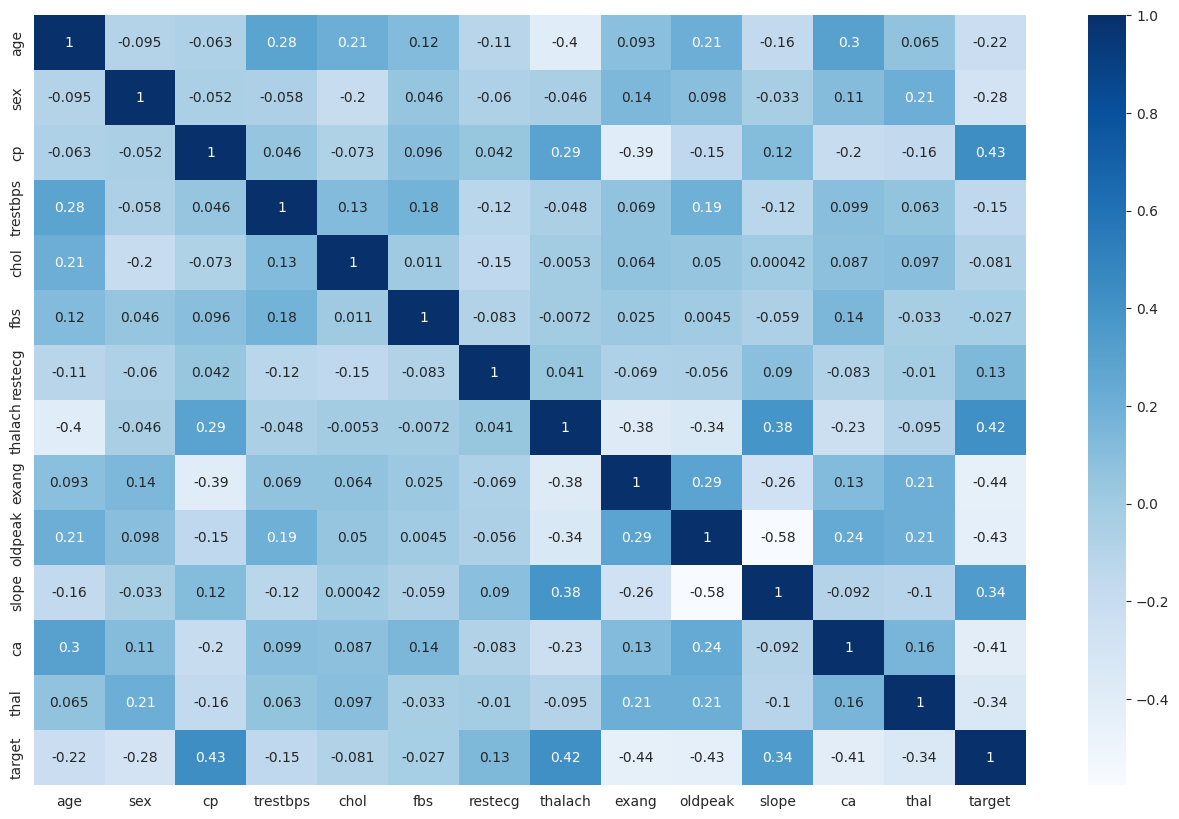

In [62]:
plt.figure(figsize = (16, 10))
sns.heatmap(dataHeart.corr(), annot = True, cmap = 'Blues')

In [63]:
dataHeart.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [64]:
dataHeart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [65]:
categories = []
numeric = []


for column in dataHeart.columns:
    print(f"{column}: {dataHeart[column].nunique()}")
    if dataHeart[column].nunique() <= 5 and column != 'target':
        categories.append(column)
    else:
        numeric.append(column)

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


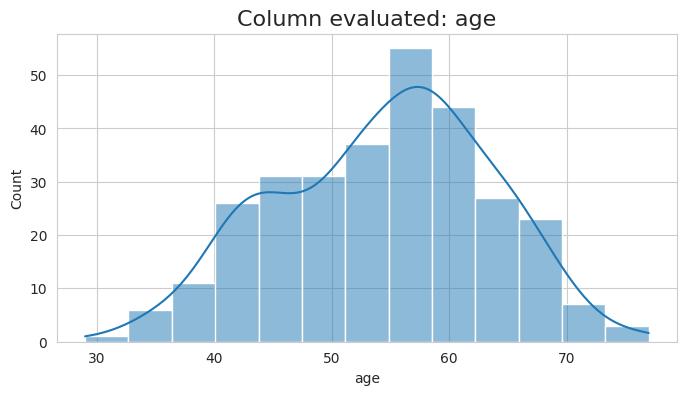

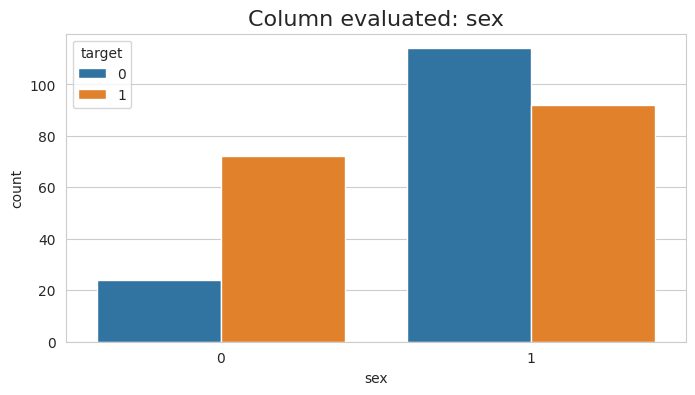

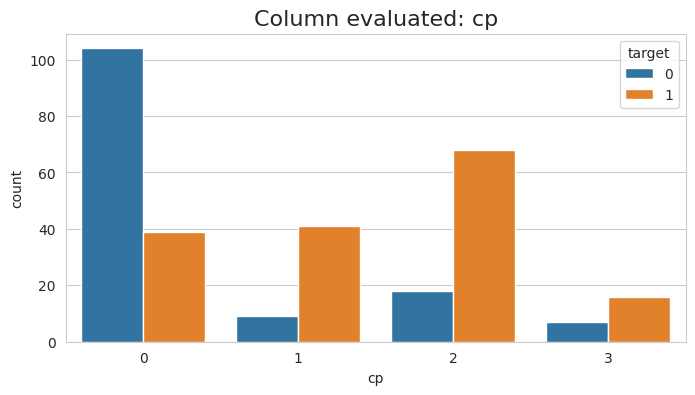

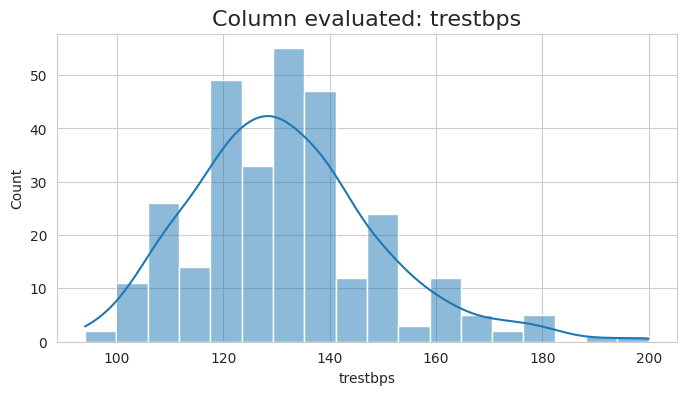

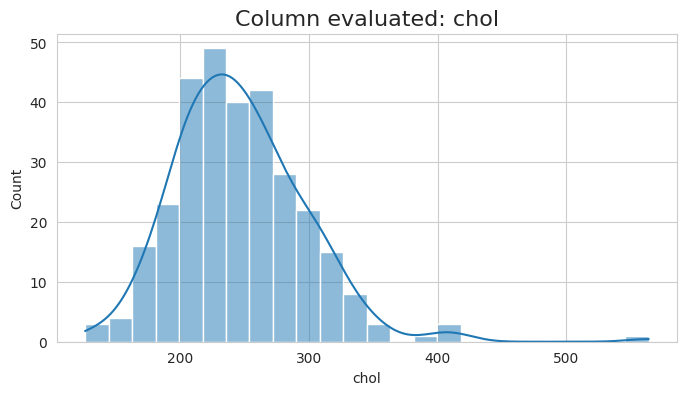

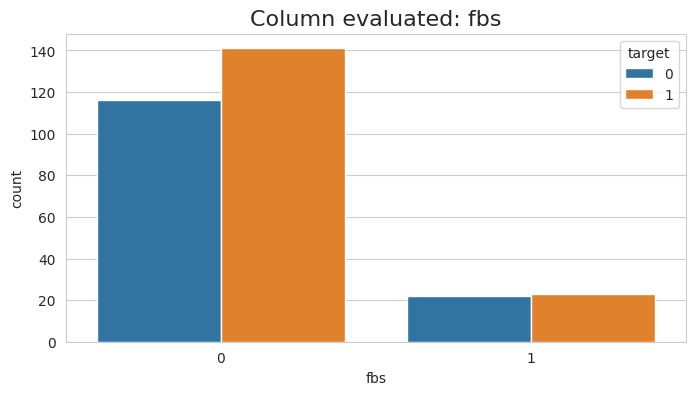

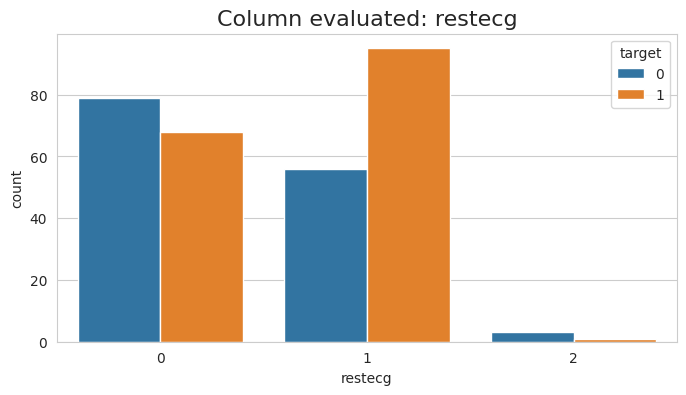

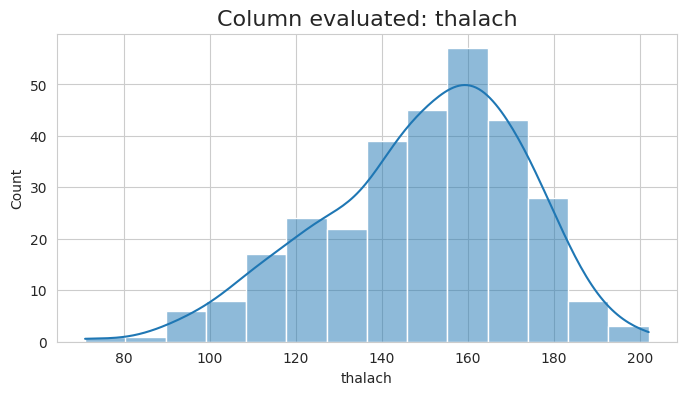

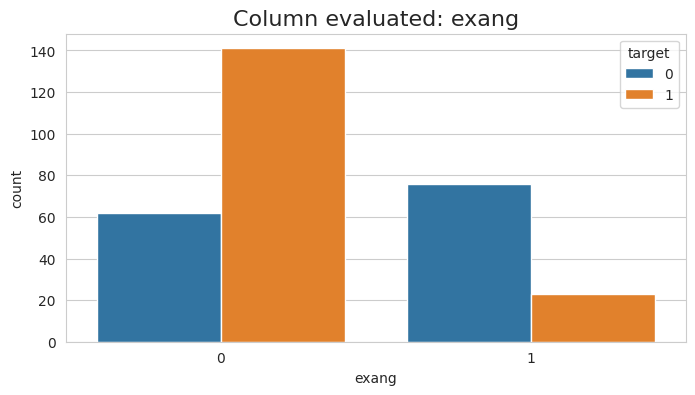

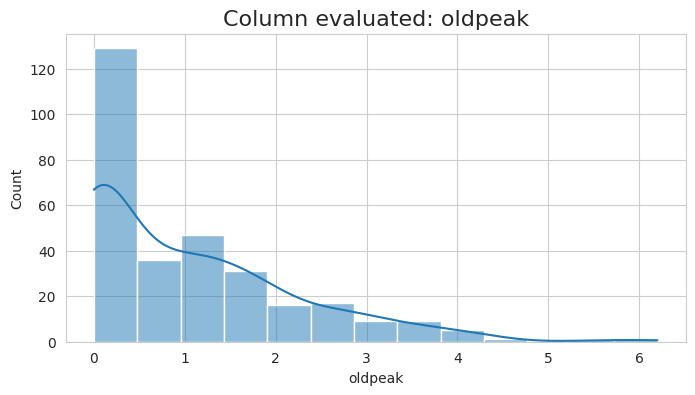

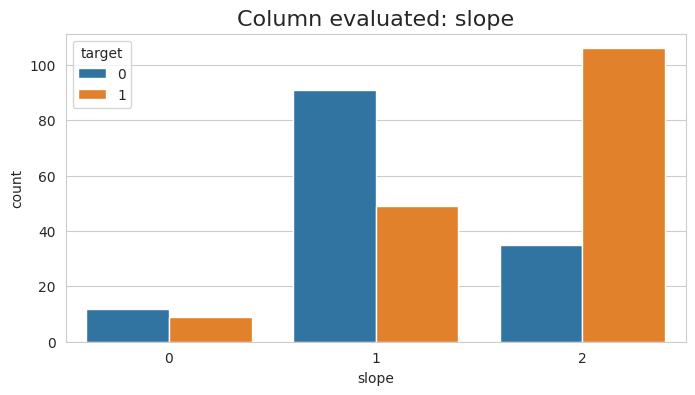

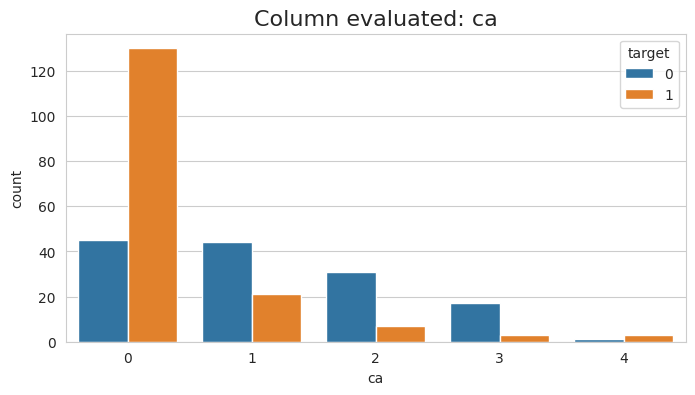

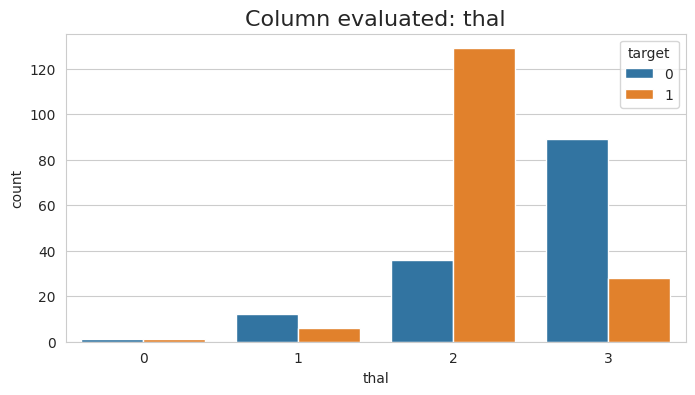

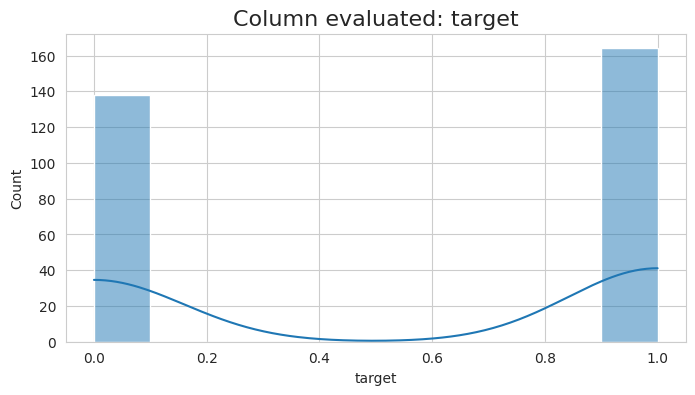

In [66]:
for column in dataHeart.columns:
    plt.figure(figsize = (8,4))
    plt.title(f"Column evaluated: {column}", fontsize = 16)
    if column in categories:
        sns.countplot(x = dataHeart[column], hue = dataHeart['target'])
    if column in numeric:
        # sns.displot(dataHeart[column], kde = True)
        sns.histplot(data= dataHeart[column], kde = True)
        

#### Removing Outliners

<Axes: >

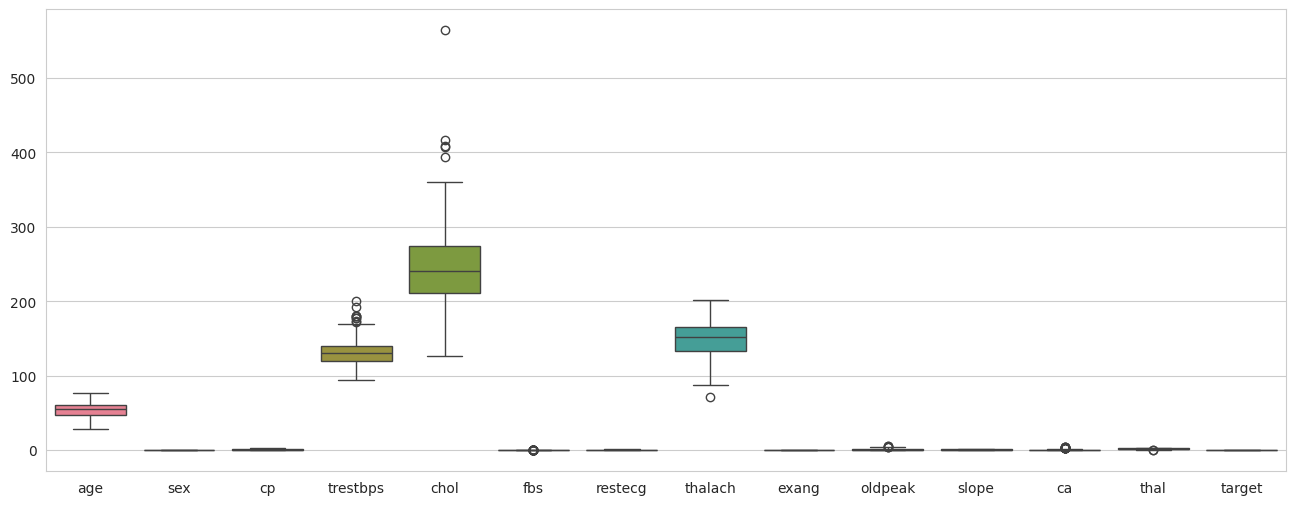

In [67]:
plt.figure(figsize = (16, 6))
sns.boxplot(dataHeart)#, points="all")

In [68]:
dataHeart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [69]:
def cutData(data, column, porcentage, count = True):
    if count == True:
        a = data[data[column] < data[column].quantile(porcentage)]
    else:
        a = data[data[column] > data[column].quantile(porcentage)]
    return a

In [70]:
dataHeart['trestbps'].quantile(0.99)

180.0

In [71]:
dataHeart_quantile = cutData(dataHeart, 'trestbps', 0.99)

In [72]:
# plt.figure(figsize = (16, 10))
px.box(dataHeart_quantile['trestbps'], points="all")
# sns.boxplot(data = dataHeart_quantile['trestbps'])

In [73]:
dataHeart['chol'].quantile(0.98)

353.98

In [74]:
dataHeart_quantile = cutData(dataHeart_quantile, 'chol', 0.98)

In [75]:
plt.figure(figsize = (16, 6))
px.box(dataHeart_quantile['chol'], points="all")

<Figure size 1600x600 with 0 Axes>

In [76]:
plt.figure(figsize = (16, 6))
px.box(dataHeart_quantile['thalach'], points="all")

<Figure size 1600x600 with 0 Axes>

In [77]:
dataHeart['thalach'].quantile(0.005)

89.01

In [78]:
dataHeart_quantile = cutData(dataHeart_quantile, 'thalach', 0.005, count = False)

In [79]:
plt.figure(figsize = (16, 6))
px.box(dataHeart_quantile['thalach'], points="all")

<Figure size 1600x600 with 0 Axes>

In [80]:
categories = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

---

In [81]:
dataHeart_quantile = pd.get_dummies(dataHeart_quantile, columns = categories)
dataHeart_quantile

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
733,44,108,141,175,0.6,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
739,52,128,255,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
843,59,160,273,125,0.0,0,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False


In [82]:
dataHeart_quantile.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

---

---

#### Machine Learning

In [83]:
X = dataHeart_quantile.drop('target', axis = 1)
y = dataHeart_quantile['target']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 42)

In [85]:
log = LogisticRegression(max_iter=1000)

In [86]:
log.fit(X_train, y_train)

/home/rvanguita/git/DataScientists/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=1000)

In [87]:
log.score(X_train, y_train).round(4), log.score(X_test, y_test).round(4)

(0.8653, 0.8646)

In [88]:
y_foreseen = log.predict(X_test)

In [89]:
accuracy_score(y_test, y_foreseen)

0.8645833333333334

In [90]:
print(classification_report(y_test, y_foreseen))

              precision    recall  f1-score   support

           0       0.94      0.75      0.84        44
           1       0.82      0.96      0.88        52

    accuracy                           0.86        96
   macro avg       0.88      0.86      0.86        96
weighted avg       0.88      0.86      0.86        96



In [91]:
confusion_matrix(y_test, y_foreseen)

array([[33, 11],
       [ 2, 50]])

---

In [92]:
def report_ml(dataFrame, algoritmo, opt = 2):
    X = dataFrame.drop('target', axis = 1)
    y = dataFrame['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 42)
    
    if opt == 0:
        ml = algoritmo(max_iter = 1000)
    elif opt == 1:
        ml = algoritmo(n_estimator = 1000)
    elif opt == 2:
        ml = algoritmo()
    
    
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f"Training Accuracy: {score_train * 100:.2f}%")
    
    score_test = ml.score(X_test, y_test)
    print(f"Test Accuracy: {score_test * 100:.2f}%")
    
    
    y_foreseen = log.predict(X_test)
    
    accuracy_score(y_test, y_foreseen)
    
    print(f"--- Classification Report ---")
    print(classification_report(y_test, y_foreseen))
    
    print(f"--- Confusion Matrix ---")    
    confusion = confusion_matrix(y_test, y_foreseen)
    sns.heatmap(confusion, annot = True, cmap = 'Blues')
    
    
    return score_train, score_test

/home/rvanguita/git/DataScientists/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Training Accuracy: 86.53%
Test Accuracy: 86.46%
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.75      0.84        44
           1       0.82      0.96      0.88        52

    accuracy                           0.86        96
   macro avg       0.88      0.86      0.86        96
weighted avg       0.88      0.86      0.86        96

--- Confusion Matrix ---


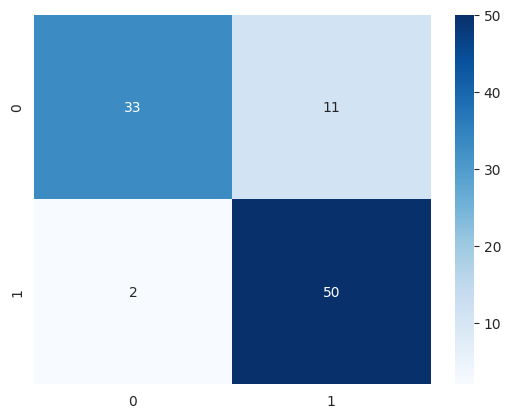

In [93]:
log_train, log_test = report_ml(dataHeart_quantile, LogisticRegression, opt = 0)

Training Accuracy: 100.00%
Test Accuracy: 77.08%
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.75      0.84        44
           1       0.82      0.96      0.88        52

    accuracy                           0.86        96
   macro avg       0.88      0.86      0.86        96
weighted avg       0.88      0.86      0.86        96

--- Confusion Matrix ---


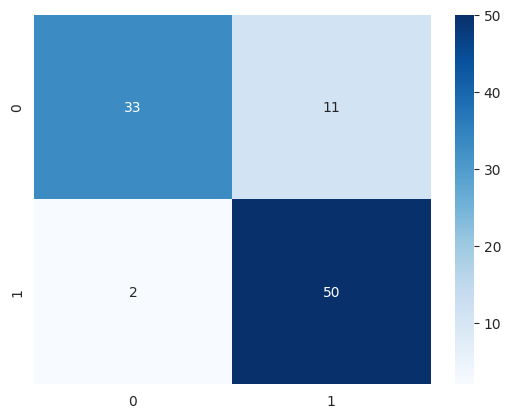

In [94]:
tree_train, tree_test = report_ml(dataHeart_quantile, DecisionTreeClassifier)

Training Accuracy: 95.34%
Test Accuracy: 81.25%
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.75      0.84        44
           1       0.82      0.96      0.88        52

    accuracy                           0.86        96
   macro avg       0.88      0.86      0.86        96
weighted avg       0.88      0.86      0.86        96

--- Confusion Matrix ---


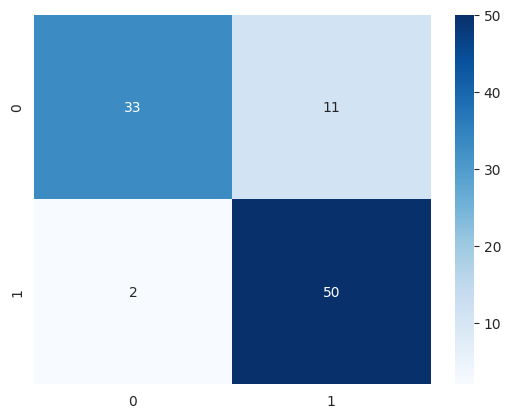

In [95]:
ada_train, ada_test = report_ml(dataHeart_quantile, AdaBoostClassifier)

Training Accuracy: 77.20%
Test Accuracy: 58.33%
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.75      0.84        44
           1       0.82      0.96      0.88        52

    accuracy                           0.86        96
   macro avg       0.88      0.86      0.86        96
weighted avg       0.88      0.86      0.86        96

--- Confusion Matrix ---


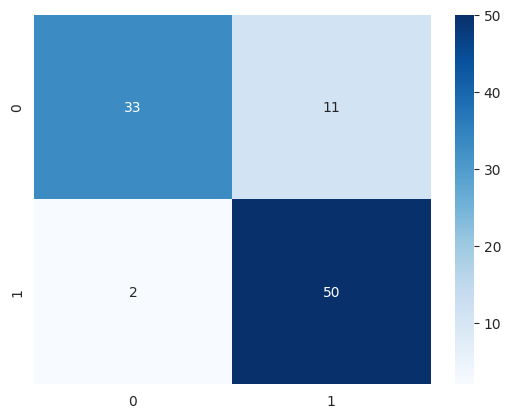

In [96]:
kn_train, kn_test = report_ml(dataHeart_quantile, KNeighborsClassifier)

Training Accuracy: 100.00%
Test Accuracy: 82.29%
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.75      0.84        44
           1       0.82      0.96      0.88        52

    accuracy                           0.86        96
   macro avg       0.88      0.86      0.86        96
weighted avg       0.88      0.86      0.86        96

--- Confusion Matrix ---


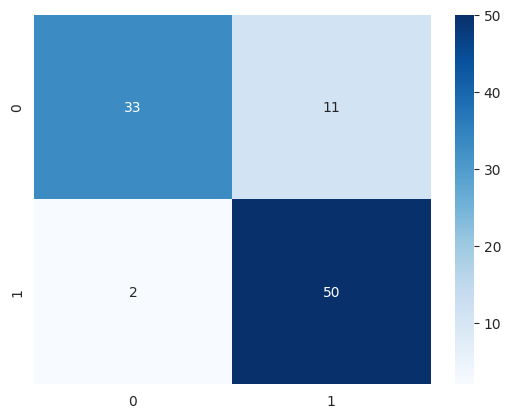

In [97]:
rand_train, rand_test = report_ml(dataHeart_quantile, RandomForestClassifier)

In [98]:
dataML = { 'Models' : ['Logistc Regression', 'Descision Tree', 'KNeighbors', \
                       'Random Forest Classifier', 'Ada Boost'], \
         'Training Accuracy' : [round(log_train * 100, 2), round(tree_train * 100, 2), \
                                round(kn_train * 100, 2), round(rand_train * 100, 2), \
                                round(ada_train * 100, 2)],\
         'Test Accuracy' : [round(log_test * 100, 2), round(tree_test * 100, 2), \
                            round(kn_test * 100, 2), round(rand_test * 100, 2),\
                            round(ada_test * 100, 2)]\
            }


dfML = pd.DataFrame(dataML)
#dfML.sort_values(by = 'Test Accuracy', ascending = False, inplace = True)
dfML  

,Models,Training Accuracy,Test Accuracy
0,Logistc Regression,86.53,86.46
1,Descision Tree,100.00,77.08
2,KNeighbors,77.20,58.33
3,Random Forest Classifier,100.00,82.29
4,Ada Boost,95.34,81.25


In [99]:
def reportML_scaler(dataFrame, algoritmo, opt = 2):
    X = dataFrame.drop('target_1', axis = 1)
    y = dataFrame['target_1']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 42)
    
    cols_scaler = numeric
    
    scaler = StandardScaler()
    
    X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
    X_test[cols_scaler] = scaler.fit_transform(X_test[cols_scaler])
    
    if opt == 0:
        ml = algoritmo(max_iter = 1000)
    elif opt == 1:
        ml = algoritmo(n_estimator = 1000)
    elif opt == 2:
        ml = algoritmo()
    
    
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f"Training Accuracy: {score_train * 100:.2f}%")
    
    score_test = ml.score(X_test, y_test)
    print(f"Test Accuracy: {score_test * 100:.2f}%")
    
    
    y_foreseen = log.predict(X_test)
    
    accuracy_score(y_test, y_foreseen)
    
    print(f"--- Classification Report ---")
    print(classification_report(y_test, y_foreseen))
    
    print(f"--- Confusion Matrix ---")    
    confusion = confusion_matrix(y_test, y_foreseen)
    sns.heatmap(confusion, annot = True, cmap = 'Blues')
    
    
    return score_train, score_test

/home/rvanguita/git/DataScientists/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Training Accuracy: 86.53%
Test Accuracy: 86.46%
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.75      0.84        44
           1       0.82      0.96      0.88        52

    accuracy                           0.86        96
   macro avg       0.88      0.86      0.86        96
weighted avg       0.88      0.86      0.86        96

--- Confusion Matrix ---


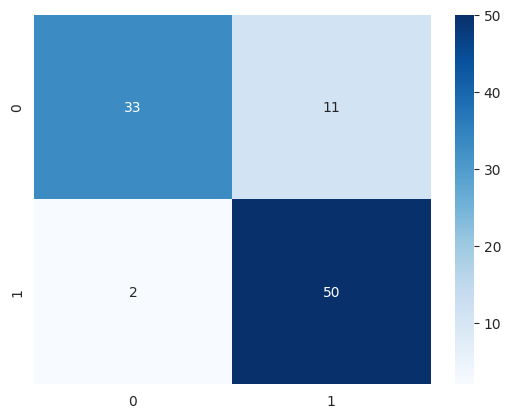

In [100]:
log_train_scaler, log_test_scaler = report_ml(dataHeart_quantile, LogisticRegression, opt = 0)

Training Accuracy: 100.00%
Test Accuracy: 77.08%
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.75      0.84        44
           1       0.82      0.96      0.88        52

    accuracy                           0.86        96
   macro avg       0.88      0.86      0.86        96
weighted avg       0.88      0.86      0.86        96

--- Confusion Matrix ---


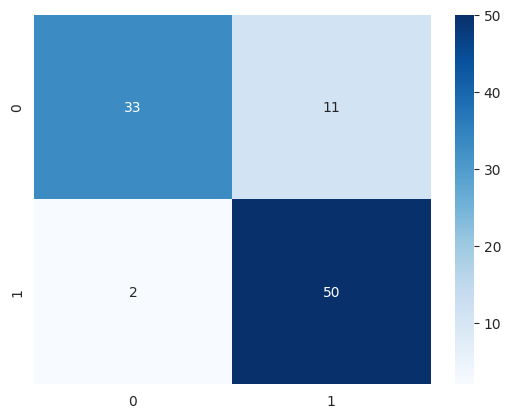

In [101]:
tree_train_scaler, tree_test_scaler = report_ml(dataHeart_quantile, DecisionTreeClassifier)

Training Accuracy: 95.34%
Test Accuracy: 81.25%
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.75      0.84        44
           1       0.82      0.96      0.88        52

    accuracy                           0.86        96
   macro avg       0.88      0.86      0.86        96
weighted avg       0.88      0.86      0.86        96

--- Confusion Matrix ---


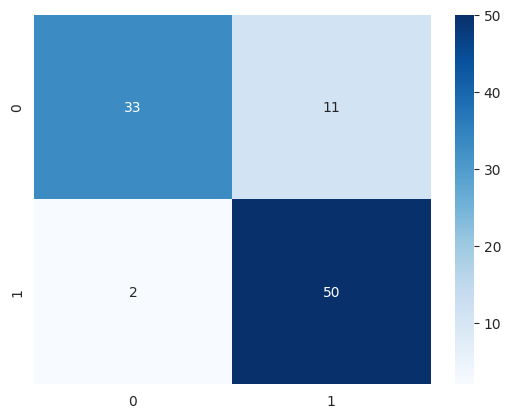

In [102]:
ada_train_scaler, ada_test_scaler = report_ml(dataHeart_quantile, AdaBoostClassifier)

Training Accuracy: 77.20%
Test Accuracy: 58.33%
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.75      0.84        44
           1       0.82      0.96      0.88        52

    accuracy                           0.86        96
   macro avg       0.88      0.86      0.86        96
weighted avg       0.88      0.86      0.86        96

--- Confusion Matrix ---


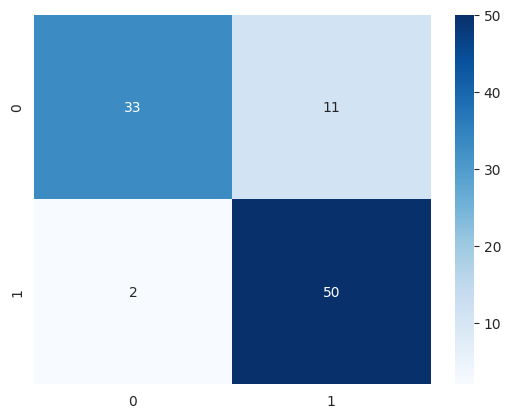

In [103]:
kn_train_scaler, kn_test_scaler = report_ml(dataHeart_quantile, KNeighborsClassifier)

Training Accuracy: 100.00%
Test Accuracy: 81.25%
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.75      0.84        44
           1       0.82      0.96      0.88        52

    accuracy                           0.86        96
   macro avg       0.88      0.86      0.86        96
weighted avg       0.88      0.86      0.86        96

--- Confusion Matrix ---


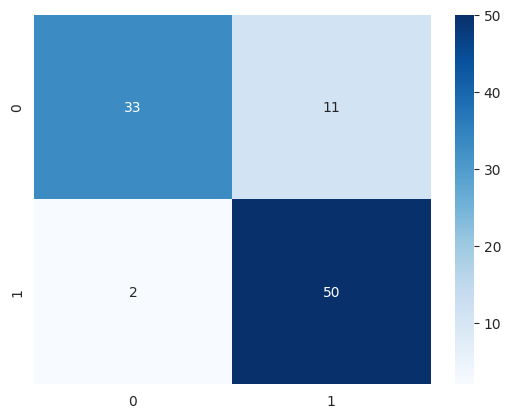

In [104]:
rand_train_scaler, rand_test_scaler = report_ml(dataHeart_quantile, RandomForestClassifier)

In [105]:
dataML_scaler = { 'Models' : ['Logistc Regression', 'Descision Tree', 'KNeighbors', \
                       'Random Forest Classifier', 'Ada Boost'], \
         'Training Accuracy' : [round(log_train_scaler * 100, 2), round(tree_train_scaler * 100, 2), \
                                round(kn_train_scaler * 100, 2), round(rand_train_scaler * 100, 2), \
                                round(ada_train_scaler * 100, 2)],\
         'Test Accuracy' : [round(log_test_scaler * 100, 2), round(tree_test_scaler * 100, 2), \
                            round(kn_test_scaler * 100, 2), round(rand_test_scaler * 100, 2),\
                            round(ada_test_scaler * 100, 2)]\
            }


dfML_scaler = pd.DataFrame(dataML_scaler)
#dfML.sort_values(by = 'Test Accuracy', ascending = False, inplace = True)
dfML_scaler

,Models,Training Accuracy,Test Accuracy
0,Logistc Regression,86.53,86.46
1,Descision Tree,100.00,77.08
2,KNeighbors,77.20,58.33
3,Random Forest Classifier,100.00,81.25
4,Ada Boost,95.34,81.25


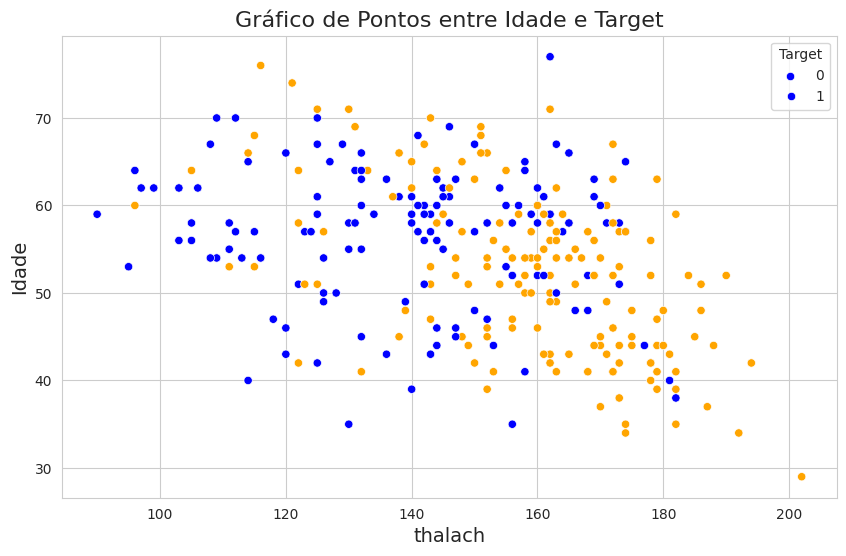

In [109]:
# Criando o gráfico de pontos com Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataHeart_quantile, x='thalach', y='age', hue='target', palette={0: 'blue', 1: 'orange'})

# Adicionando títulos e rótulos aos eixos
plt.title('Gráfico de Pontos entre Idade e Target', fontsize=16)
plt.xlabel('thalach', fontsize=14)
plt.ylabel('Idade', fontsize=14)

# Adicionando a legenda
plt.legend(title='Target', labels=['0', '1'])

# Exibindo o gráfico
plt.show()

In [143]:
dataHeart_quantile.sum(axis=1).axis='rows'
dataHeart_quantile

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,clust
0,52,125,212,168,1.0,0,False,True,True,False,...,False,False,True,False,False,False,False,False,True,4
1,53,140,203,155,3.1,0,False,True,True,False,...,True,False,False,False,False,False,False,False,True,4
2,70,145,174,125,2.6,0,False,True,True,False,...,True,False,False,False,False,False,False,False,True,2
3,61,148,203,161,0.0,0,False,True,True,False,...,False,True,False,False,False,False,False,False,True,4
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,True,False,False,False,True,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,True,False,False,False,...,True,False,False,False,False,False,False,True,False,2
733,44,108,141,175,0.6,1,True,False,False,False,...,True,False,False,False,False,False,False,True,False,4
739,52,128,255,161,0.0,0,False,True,True,False,...,False,True,False,False,False,False,False,False,True,0
843,59,160,273,125,0.0,0,False,True,False,False,...,True,False,False,False,False,False,False,True,False,3


In [146]:
X = dataHeart_quantile.div(dataHeart_quantile.sum(axis=1), axis='rows')
X

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,clust
0,0.091228,0.219298,0.37193,0.294737,0.001754,0.0,0.0,0.001754,0.001754,0.0,...,0.0,0.0,0.001754,0.0,0.0,0.0,0.0,0.0,0.001754,0.007018
1,0.093623,0.247306,0.358594,0.273803,0.005476,0.0,0.0,0.001766,0.001766,0.0,...,0.001766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001766,0.007066
2,0.132928,0.275351,0.330422,0.237372,0.004937,0.0,0.0,0.001899,0.001899,0.0,...,0.001899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001899,0.003798
3,0.104274,0.252991,0.347009,0.275214,0.0,0.0,0.0,0.001709,0.001709,0.0,...,0.0,0.001709,0.0,0.0,0.0,0.0,0.0,0.0,0.001709,0.006838
4,0.101158,0.225159,0.479687,0.172948,0.0031,0.0,0.001632,0.0,0.001632,0.0,...,0.0,0.0,0.0,0.001632,0.0,0.0,0.0,0.001632,0.0,0.004895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,0.129155,0.22792,0.40076,0.218424,0.002849,0.001899,0.001899,0.0,0.0,0.0,...,0.001899,0.0,0.0,0.0,0.0,0.0,0.0,0.001899,0.0,0.003799
733,0.091362,0.224252,0.292774,0.363372,0.001246,0.002076,0.002076,0.0,0.0,0.0,...,0.002076,0.0,0.0,0.0,0.0,0.0,0.0,0.002076,0.0,0.008306
739,0.086093,0.211921,0.422185,0.266556,0.0,0.0,0.0,0.001656,0.001656,0.0,...,0.0,0.001656,0.0,0.0,0.0,0.0,0.0,0.0,0.001656,0.0
843,0.093949,0.254777,0.434713,0.199045,0.0,0.0,0.0,0.001592,0.0,0.0,...,0.001592,0.0,0.0,0.0,0.0,0.0,0.0,0.001592,0.0,0.004777


2


3
4
5
6
7
8
9
10
11
12
13
14


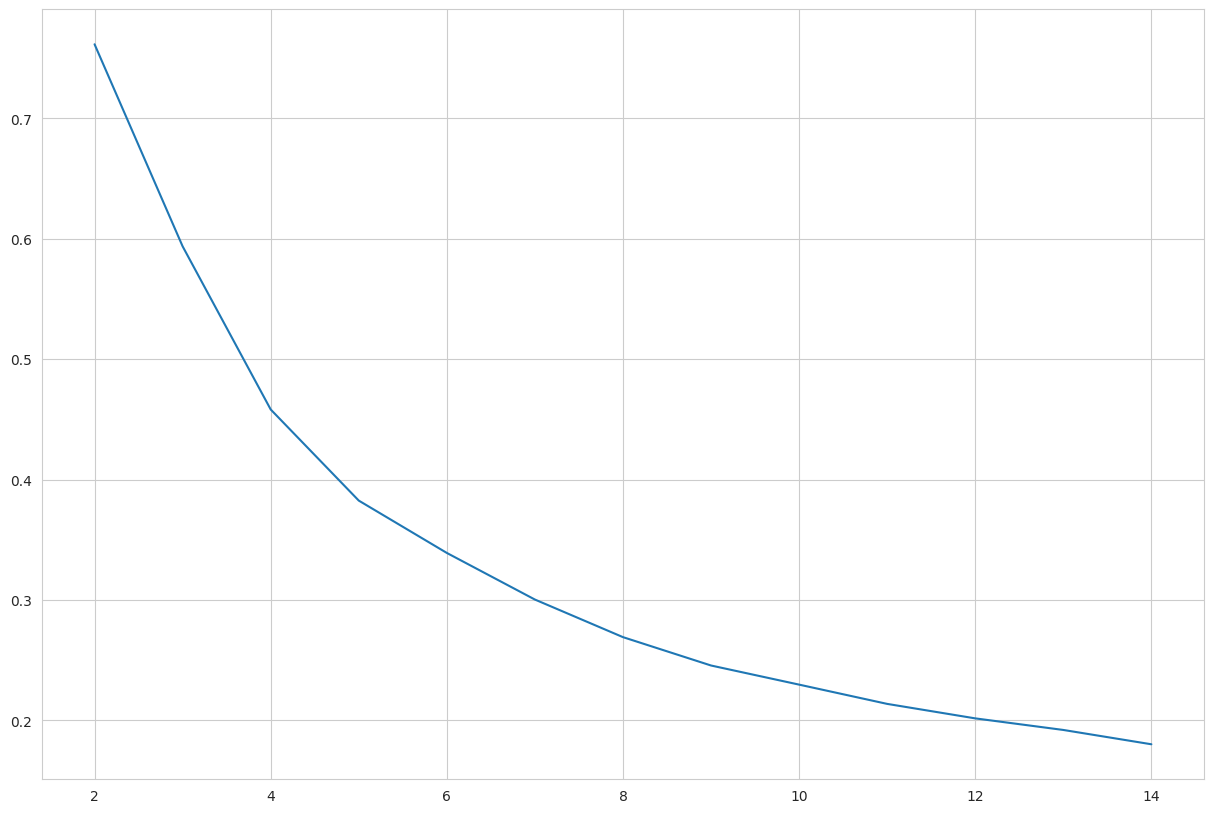

In [145]:
from sklearn.cluster import KMeans

distortions = []
n_clusters = range(2, 15)
for n_cluster in n_clusters:
		print(n_cluster)
		distortions.append(KMeans(n_clusters = n_cluster,
                            max_iter = 10_000,
                            n_init = 100,
                            random_state = 2024).fit(X).inertia_
                     )
plt.figure(figsize=(15,10))
plt.plot(n_clusters, distortions)
plt.show()

In [148]:
km = KMeans(n_clusters=5,max_iter = 10_000,n_init = 100,random_state = 2024)
X_t = km.fit_predict(X)
len(X_t)

289

In [149]:
dataHeart_quantile['clust'] = X_t
dataHeart_quantile

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,clust
0,52,125,212,168,1.0,0,False,True,True,False,...,False,False,True,False,False,False,False,False,True,2
1,53,140,203,155,3.1,0,False,True,True,False,...,True,False,False,False,False,False,False,False,True,0
2,70,145,174,125,2.6,0,False,True,True,False,...,True,False,False,False,False,False,False,False,True,0
3,61,148,203,161,0.0,0,False,True,True,False,...,False,True,False,False,False,False,False,False,True,0
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,True,False,False,False,True,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,True,False,False,False,...,True,False,False,False,False,False,False,True,False,4
733,44,108,141,175,0.6,1,True,False,False,False,...,True,False,False,False,False,False,False,True,False,0
739,52,128,255,161,0.0,0,False,True,True,False,...,False,True,False,False,False,False,False,False,True,1
843,59,160,273,125,0.0,0,False,True,False,False,...,True,False,False,False,False,False,False,True,False,4


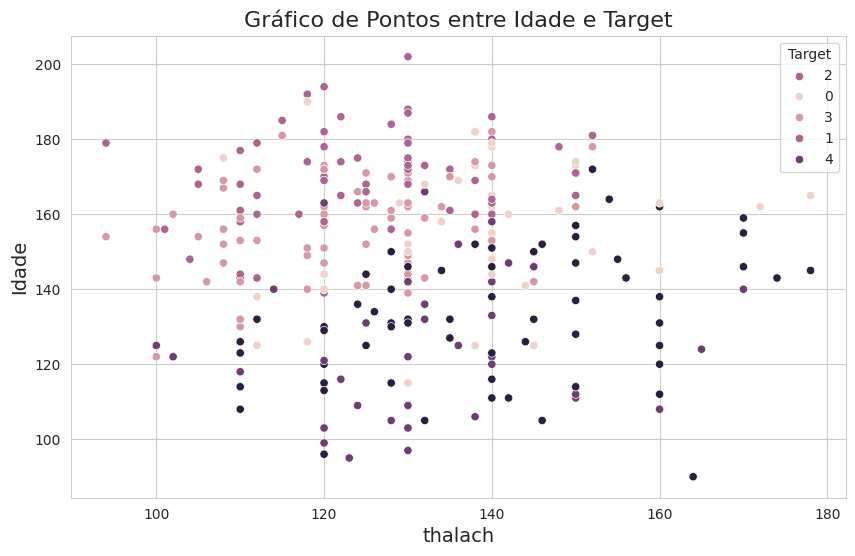

In [152]:
# Criando o gráfico de pontos com Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataHeart_quantile, x='trestbps', y='thalach', hue='clust')

# Adicionando títulos e rótulos aos eixos
plt.title('Gráfico de Pontos entre Idade e Target', fontsize=16)
plt.xlabel('thalach', fontsize=14)
plt.ylabel('Idade', fontsize=14)

# Adicionando a legenda
plt.legend(title='Target', labels=dataHeart_quantile['clust'].unique())

# Exibindo o gráfico
plt.show()